ye code , proper file strycture ke sath complete kar dega.

In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Define parameters
diseases = ["Alzheimer's", "Parkinson's", "Epilepsy", "Migraine", "Healthy"]
frequency_bands = ["Delta", "Theta", "Alpha", "Beta", "Gamma"]
electrodes = ["Fp1", "Fz", "F3", "F7", "FT9", "FC5", "FC1", "C3", "T7", "TP9"]
num_samples_per_file = 100
num_files_per_band = 5

# Base directory for output
base_folder = "./BrainDisease_EEG_Data"
os.makedirs(base_folder, exist_ok=True)

# Generate random EEG data and save to respective folders
for disease in diseases:
    disease_path = os.path.join(base_folder, disease)
    os.makedirs(disease_path, exist_ok=True)
    
    for band in frequency_bands:
        band_path = os.path.join(disease_path, band)
        os.makedirs(band_path, exist_ok=True)
        
        for i in range(num_files_per_band):
            data = []
            for _ in range(num_samples_per_file):
                name = np.random.choice(electrodes)
                x = np.random.uniform(-85, 85)
                y = np.random.uniform(-85, 85)
                z = np.random.uniform(-85, 85)
                magnitude = np.sqrt(x**2 + y**2 + z**2)
                row_mean = np.mean([x, y, z])
                data.append([name, x, y, z, magnitude, row_mean])
            
            # Create DataFrame
            df = pd.DataFrame(data, columns=["Electrode", "x", "y", "z", "Magnitude", "Row_Mean"])
            
            # Preprocess
            scaler = StandardScaler()
            df[["x", "y", "z", "Magnitude", "Row_Mean"]] = scaler.fit_transform(
                df[["x", "y", "z", "Magnitude", "Row_Mean"]]
            )
            
            # Save file
            file_name = f"{band}_data_{i+1}.csv"
            file_path = os.path.join(band_path, file_name)
            df.to_csv(file_path, index=False)

print(f"Data generation complete. Check the '{base_folder}' directory.")


Data generation complete. Check the './BrainDisease_EEG_Data' directory.


ek hi folder me sara data la ke de dega .

In [1]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import numpy as np
import random
import os

# Parameters
num_samples = 1000
diseases = ["Alzheimer's", "Parkinson's", "Epilepsy", "Migraine", "Healthy"]
moods = ["Happy", "Sad", "Anxious", "Calm", "Depressed"]
electrodes = ["Fp1", "Fz", "F3", "F7", "FT9", "FC5", "FC1", "C3", "T7", "TP9"]

# Directory to save the file
output_dir = "./datasets"
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Generate data
data = []
for _ in range(num_samples):
    name = random.choice(electrodes)
    x = np.random.uniform(-85, 85)
    y = np.random.uniform(-85, 85)
    z = np.random.uniform(-85, 85)
    magnitude = np.sqrt(x**2 + y**2 + z**2)
    row_mean = np.mean([x, y, z])
    disease = random.choice(diseases)
    mood = random.choice(moods)
    data.append([x, y, z, magnitude, row_mean, disease, mood])

# Create DataFrame
columns = ["x", "y", "z", "Magnitude", "Row_Mean", "Disease", "Mood"]
df = pd.DataFrame(data, columns=columns)

# Preprocess
scaler = StandardScaler()
df[["x", "y", "z", "Magnitude", "Row_Mean"]] = scaler.fit_transform(df[["x", "y", "z", "Magnitude", "Row_Mean"]])

# Save to CSV
output_file = os.path.join(output_dir, "brain_disease_mood_dataset.csv")
df.to_csv(output_file, index=False)

print(f"Dataset saved successfully to {output_file}")


Dataset saved successfully to ./datasets\brain_disease_mood_dataset.csv


koi output nahi dega , bas chalega .

In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random

# Parameters
num_samples = 1000
diseases = ["Alzheimer's", "Parkinson's", "Epilepsy", "Migraine", "Healthy"]
moods = ["Happy", "Sad", "Anxious", "Calm", "Depressed"]
electrodes = ["Fp1", "Fz", "F3", "F7", "FT9", "FC5", "FC1", "C3", "T7", "TP9"]

# Generate data
data = []
for _ in range(num_samples):
    name = random.choice(electrodes)
    x = np.random.uniform(-85, 85)
    y = np.random.uniform(-85, 85)
    z = np.random.uniform(-85, 85)
    magnitude = np.sqrt(x**2 + y**2 + z**2)
    row_mean = np.mean([x, y, z])
    disease = random.choice(diseases)
    mood = random.choice(moods)
    data.append([x, y, z, magnitude, row_mean, disease, mood])

# Create DataFrame
columns = ["x", "y", "z", "Magnitude", "Row_Mean", "Disease", "Mood"]
df = pd.DataFrame(data, columns=columns)

# Preprocess
scaler = StandardScaler()
df[["x", "y", "z", "Magnitude", "Row_Mean"]] = scaler.fit_transform(df[["x", "y", "z", "Magnitude", "Row_Mean"]])

encoder = OneHotEncoder()
encoded_diseases = encoder.fit_transform(df[["Disease"]]).toarray()
encoded_moods = encoder.fit_transform(df[["Mood"]]).toarray()

df_encoded = pd.concat([df, pd.DataFrame(encoded_diseases), pd.DataFrame(encoded_moods)], axis=1)

# Train-test split
X = df[["x", "y", "z", "Magnitude", "Row_Mean"]].values
y_disease = encoded_diseases
y_mood = encoded_moods
X_train, X_test, y_disease_train, y_disease_test, y_mood_train, y_mood_test = train_test_split(
    X, y_disease, y_mood, test_size=0.2, random_state=42
)

print("Data preparation complete.")


Data preparation complete.


In [5]:
import numpy as np
import pandas as pd
import random

# Parameters
num_samples = 60  # Number of entries to generate

# EEG electrode names
electrodes = [
    "Fp1", "Fz", "F3", "F7", "FT9", "FC5", "FC1", "C3", "T7", "TP9",
    "CP5", "CP1", "Pz", "P3", "P7", "O1", "Oz", "O2", "P4", "P8",
    "TP10", "CP6", "CP2", "Cz", "C4", "T8", "FT10", "FC6", "FC2", "F4",
    "F8", "Fp2", "AF7", "AF3", "AFz", "F1", "F5", "FT7", "FC3", "FCz",
    "C1", "C5", "TP7", "CP3", "P1", "P5", "PO7", "PO3", "POz", "PO4",
    "PO8", "P6", "P2", "CP4", "TP8", "C6", "C2", "FC4", "FT8", "F6", "F2"
]

# Randomize the sequence of electrode names
random.shuffle(electrodes)

# Generate random data
data = []
for i in range(num_samples):
    name = electrodes[i % len(electrodes)]  # Loop through shuffled electrodes
    x = np.random.uniform(-85, 85)  # Random x
    y = np.random.uniform(-85, 85)  # Random y
    z = np.random.uniform(-85, 85)  # Random z
    magnitude = np.sqrt(x**2 + y**2 + z**2)  # Magnitude calculation
    row_mean = np.mean([x, y, z])  # Mean of x, y, z
    data.append([name, x, y, z, magnitude, row_mean])

# Convert to DataFrame
columns = ["name", "x", "y", "z", "Magnitude", "Row_Mean"]
df = pd.DataFrame(data, columns=columns)

# Save to CSV
output_file = "random_eeg_data.csv"
df.to_csv(output_file, index=False)

print(f"Random data saved to {output_file}")


Random data saved to random_eeg_data.csv


In [4]:
import os
import numpy as np
import pandas as pd

# Parameters
sampling_rate = 128  # Hz
duration = 10  # seconds
num_channels = 14  # Number of EEG channels
time = np.linspace(0, duration, sampling_rate * duration)

# Frequency ranges
frequency_bands = {
    "Delta_0.5-4Hz": (0.5, 4),
    "Theta_4-8Hz": (4, 8),
    "Alpha_8-13Hz": (8, 13),
    "Beta_13-30Hz": (13, 30),
    "Gamma_gt30Hz": (30, 50),
}

# Brain diseases
brain_diseases = ["Healthy", "Alzheimer", "Parkinson", "Epilepsy"]

# Base folder
base_folder = "BrainDisease_EEG_Data"

# Create folders
for disease in brain_diseases:
    for band in frequency_bands.keys():
        folder_path = os.path.join(base_folder, disease, band)
        os.makedirs(folder_path, exist_ok=True)

# Function to generate synthetic EEG signals for a frequency band
def generate_eeg_signal(freq_range, duration, sampling_rate):
    freq = np.random.uniform(*freq_range)
    signal = np.sin(2 * np.pi * freq * time) + np.random.normal(0, 0.5, len(time))
    return signal

# Generate data and save to appropriate folders
for disease in brain_diseases:
    for band, freq_range in frequency_bands.items():
        for channel in range(1, num_channels + 1):
            signal = generate_eeg_signal(freq_range, duration, sampling_rate)
            file_name = f"Channel_{channel}.csv"
            folder_path = os.path.join(base_folder, disease, band)
            file_path = os.path.join(folder_path, file_name)
            
            # Save as CSV
            df = pd.DataFrame({
                "Time": time,
                "Amplitude": signal
            })
            df.to_csv(file_path, index=False)

print(f"EEG data generated and stored in '{base_folder}'.")


EEG data generated and stored in 'BrainDisease_EEG_Data'.


Synthetic EEG data saved to synthetic_eeg_data.csv


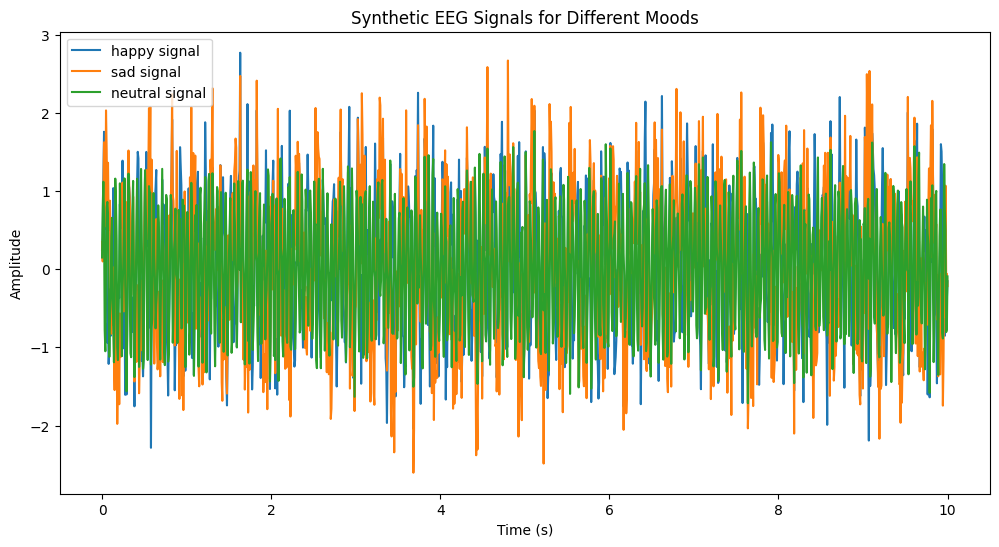

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
sampling_rate = 128  # Hz
duration = 10  # seconds
num_channels = 14  # Number of EEG channels
time = np.linspace(0, duration, sampling_rate * duration)

# Generate synthetic EEG signals for each mood
def generate_eeg_data(mood):
    np.random.seed(42)  # For reproducibility
    
    if mood == "happy":
        freq = 10  # Alpha waves (8–12 Hz, typical in relaxed states)
        signal = np.sin(2 * np.pi * freq * time) + np.random.normal(0, 0.5, len(time))
    elif mood == "sad":
        freq = 4  # Theta waves (4–8 Hz, associated with sadness or meditation)
        signal = np.sin(2 * np.pi * freq * time) + np.random.normal(0, 0.7, len(time))
    elif mood == "neutral":
        freq = 20  # Beta waves (12–30 Hz, neutral or alert states)
        signal = np.sin(2 * np.pi * freq * time) + np.random.normal(0, 0.3, len(time))
    else:
        raise ValueError("Unknown mood")
    
    return signal

# Create a DataFrame for EEG data
eeg_data = []
for mood in ["happy", "sad", "neutral"]:
    for channel in range(num_channels):
        signal = generate_eeg_data(mood)
        eeg_data.append({
            "Channel": f"Channel_{channel + 1}",
            "Mood": mood,
            "Signal": signal
        })

# Flatten and structure the data for visualization and saving
eeg_flat_data = []
for entry in eeg_data:
    for i, value in enumerate(entry["Signal"]):
        eeg_flat_data.append({
            "Time": i / sampling_rate,
            "Channel": entry["Channel"],
            "Mood": entry["Mood"],
            "Amplitude": value
        })

eeg_df = pd.DataFrame(eeg_flat_data)

# Save the synthetic EEG data to a CSV
output_file = "synthetic_eeg_data.csv"
eeg_df.to_csv(output_file, index=False)
print(f"Synthetic EEG data saved to {output_file}")

# Plot an example signal
plt.figure(figsize=(12, 6))
for mood in ["happy", "sad", "neutral"]:
    plt.plot(time, generate_eeg_data(mood), label=f"{mood} signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.title("Synthetic EEG Signals for Different Moods")
plt.show()
